# 4 Modeling<a id='4_Modeling'></a>

  * [4.1 Contents](#4.1_Contents)
  * [4.2 Introduction](#4.2_Introduction)
  * [4.3 Imports](#4.3_Imports)
  * [4.4 Load and Scale the Data](#4.4_Load_Scale_Data)
  * [4.5 Modeling](#4.5_Modeling)
    * [4.5.1 Random Forest Regression Modeling](#4.5.1_Random_Forest)
    * [4.5.2 K-nearest Neighbors Regression Modeling](#4.5.2_KNN)
    * [4.5.3 Extreme Gradient Boosting Model](#4.5.3_XGBoost)
    * [4.5.4 Catboost Regression Modeling](#4.5.4_Catboost)
  * [4.6 Summary](#4.6_Summary)


## 4.2 Introduction<a id='4.2_Introduction'></a>

In the previous notebook, we used pycaret to determine several best models for the dataset. In this notebook, we will conduct  machine learning modeling with three models using scikit learn. 

Here we will use four machine modeling approaches: random forest regression, extreme gradient boosting, KNN regression, and catboost regression to investigate the performance and accuracy of each model.

## 4.3 Imports<a id='4.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import catboost as cat

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

sns.set_style('darkgrid')
%matplotlib inline

## 4.4 Load and Scale the Data<a id='4.4_Load_Scale_Data'></a>

In [2]:
df = pd.read_csv('../data/data_for_model.csv')
df.head()

,construction,crsdiscount,deductibleamountinbuildingcoverage,deductibleamountincontentscoverage,elevatedbuildingindicator,elevationdifference,numberoffloorsininsuredbuilding,primaryresidenceindicator,smallbusinessindicatorbuilding,buildingage,...,locationofcontents_E,occupancytype_2,occupancytype_3,occupancytype_4,occupancytype_6,ratemethod_2,ratemethod_B,ratemethod_W,premium_scale,coverage_scale
0,0,3.0,6.0,4.0,0,1,1.0,1,0,38.0,...,0,0,0,0,0,0,0,0,2.860937,5.406199
1,0,5.0,2.0,2.0,0,7,1.0,1,0,45.0,...,0,0,0,0,0,0,1,0,2.324282,5.079181
2,0,5.0,2.5,2.5,0,0,1.0,0,0,20.0,...,0,0,0,0,0,0,0,0,3.187521,5.544068
3,0,5.0,2.5,2.5,0,3,2.0,1,0,43.0,...,0,1,0,0,0,0,1,0,2.550228,5.482874
4,0,5.0,2.5,2.5,0,3,1.0,1,0,61.0,...,0,0,0,0,0,0,1,0,2.423246,5.195900


Let's split the dataset into train and test datasets, and the same datasets will be used in each model.

In [3]:
X = df.drop(columns='premium_scale')
y = df.premium_scale
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8632, 29) (3700, 29) (8632,) (3700,)


In [4]:
scaler = StandardScaler()
X_train[['crsdiscount', 'deductibleamountinbuildingcoverage', 'deductibleamountincontentscoverage',
        'elevationdifference', 'numberoffloorsininsuredbuilding', 'buildingage', 
         'coverage_scale']] = scaler.fit_transform(X_train[['crsdiscount', 
         'deductibleamountinbuildingcoverage', 'deductibleamountincontentscoverage', 
          'elevationdifference', 'numberoffloorsininsuredbuilding', 'buildingage', 'coverage_scale']])

C:\Users\Cheng\AppData\Local\Temp\ipykernel_24048\223278439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['crsdiscount', 'deductibleamountinbuildingcoverage', 'deductibleamountincontentscoverage',


In [5]:
X_test[['crsdiscount', 'deductibleamountinbuildingcoverage', 'deductibleamountincontentscoverage',
        'elevationdifference', 'numberoffloorsininsuredbuilding', 'buildingage', 
        'coverage_scale']] = scaler.transform(X_test[['crsdiscount', 
        'deductibleamountinbuildingcoverage', 'deductibleamountincontentscoverage', 
        'elevationdifference', 'numberoffloorsininsuredbuilding', 'buildingage', 'coverage_scale']])

C:\Users\Cheng\AppData\Local\Temp\ipykernel_24048\2084790085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['crsdiscount', 'deductibleamountinbuildingcoverage', 'deductibleamountincontentscoverage',


In [6]:
X_train.head()

,construction,crsdiscount,deductibleamountinbuildingcoverage,deductibleamountincontentscoverage,elevatedbuildingindicator,elevationdifference,numberoffloorsininsuredbuilding,primaryresidenceindicator,smallbusinessindicatorbuilding,buildingage,...,locationofcontents_D,locationofcontents_E,occupancytype_2,occupancytype_3,occupancytype_4,occupancytype_6,ratemethod_2,ratemethod_B,ratemethod_W,coverage_scale
1568,0,-0.628081,-0.545934,-0.510642,0,-0.200930,-0.795936,1,0,0.047056,...,0,0,0,0,0,0,0,0,0,-0.091263
462,0,-0.628081,-0.545934,-0.510642,0,-0.716669,0.639009,1,0,0.257708,...,0,0,0,0,0,0,0,0,0,0.850184
743,0,0.627354,-0.545934,-0.510642,0,-0.200930,-0.795936,1,0,-0.058270,...,0,0,0,0,0,0,0,0,0,0.046055
222,0,0.627354,-0.545934,-0.510642,1,0.830547,2.073954,1,0,-1.058866,...,0,0,0,0,0,0,0,0,0,0.850184
7954,0,-0.628081,-0.545934,-0.510642,0,0.830547,0.639009,1,0,-1.743485,...,0,0,0,0,0,0,0,0,0,0.491631


In [7]:
X_test.head()

,construction,crsdiscount,deductibleamountinbuildingcoverage,deductibleamountincontentscoverage,elevatedbuildingindicator,elevationdifference,numberoffloorsininsuredbuilding,primaryresidenceindicator,smallbusinessindicatorbuilding,buildingage,...,locationofcontents_D,locationofcontents_E,occupancytype_2,occupancytype_3,occupancytype_4,occupancytype_6,ratemethod_2,ratemethod_B,ratemethod_W,coverage_scale
8917,0,-0.628081,-0.545934,-0.510642,0,0.314809,-0.795936,0,0,-1.164192,...,0,0,0,0,0,1,0,0,0,1.804783
772,0,0.627354,-0.149415,-0.106226,1,-0.716669,0.639009,1,0,-1.269518,...,0,0,0,0,0,0,0,0,0,0.158780
12252,0,-0.628081,-0.545934,-0.510642,0,-0.200930,0.639009,1,0,0.047056,...,0,0,0,0,0,0,0,0,0,-0.086288
7793,0,0.627354,1.436664,1.511438,0,-0.716669,0.639009,1,0,0.942327,...,0,0,0,0,0,0,0,1,0,0.850184
6601,0,0.627354,-0.545934,-0.510642,1,-0.200930,0.639009,1,0,-1.585496,...,0,0,0,0,0,0,0,0,0,0.850184


## 4.5 Modeling<a id='4.5_Modeling'></a>

We will select four machine learning models to examine the dataset.

### 4.5.1 Random Forest Regression Model<a id='4.5.1_Random_Forest'></a>

First, let's just apply the default settings of random forest regression model to see how the model performs.

In [8]:
rf = RandomForestRegressor(random_state=123)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [9]:
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred)) 
print('R2: ', r2_score(y_test, y_pred)) 

MAE:  0.026344010206394874
MSE:  0.003906613195245852
R2:  0.9484058445997554


As we can see, using the default settings of random forest regression gives us a very good fit: R2 is 0.95, mean absolute error is 0.026. Mean squared error is 0.004. We can still tune the hyperparameters to see if we can get slightly better performance.

A few hyperparameters are selected to be varied in the GridSearch process, including:

bootstrap: use True and False

n_estimators: use 100, 200, and 300;

max_features: use 'auto', 'sqrt', and 'log2';

max_depth: use None, 4, 6, and 8;

In [10]:
rf_reg = RandomForestRegressor(random_state=123)
param_grid = {
   'bootstrap': [True, False],
   'n_estimators': [100, 200, 300],
   'max_depth': [None, 4, 6, 8],
   'max_features': ['auto', 'sqrt', 'log2'],
}
GSCV_rf = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5)
GSCV_rf.fit(X_train, y_train)
print("Best parameters:", GSCV_rf.best_params_)

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 300}


In [11]:
y_pred = GSCV_rf.predict(X_test)

In [12]:
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred)) 
print('R2: ', r2_score(y_test, y_pred)) 

MAE:  0.026088372106323865
MSE:  0.003872864514937847
R2:  0.9488515592301374


We can see that the MAE, MSE, and R2 values from the model with the best estimator are about the same as those with the default settings of random forest regression. 

Let's plot the estimated premium price vs. actual premium price for the test dataset.

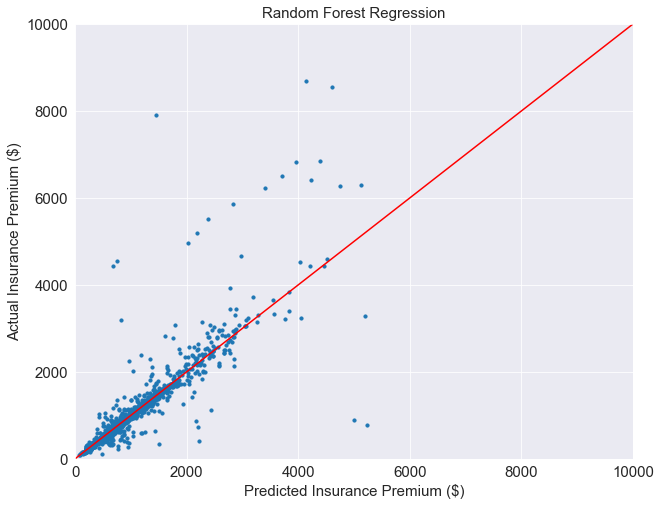

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(10**y_pred, 10**y_test, s=10)
plt.title('Random Forest Regression', fontsize=15)
plt.xlabel('Predicted Insurance Premium ($)', fontsize=15)
plt.ylabel('Actual Insurance Premium ($)', fontsize=15)
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot([0,10000],[0,10000], color='r')

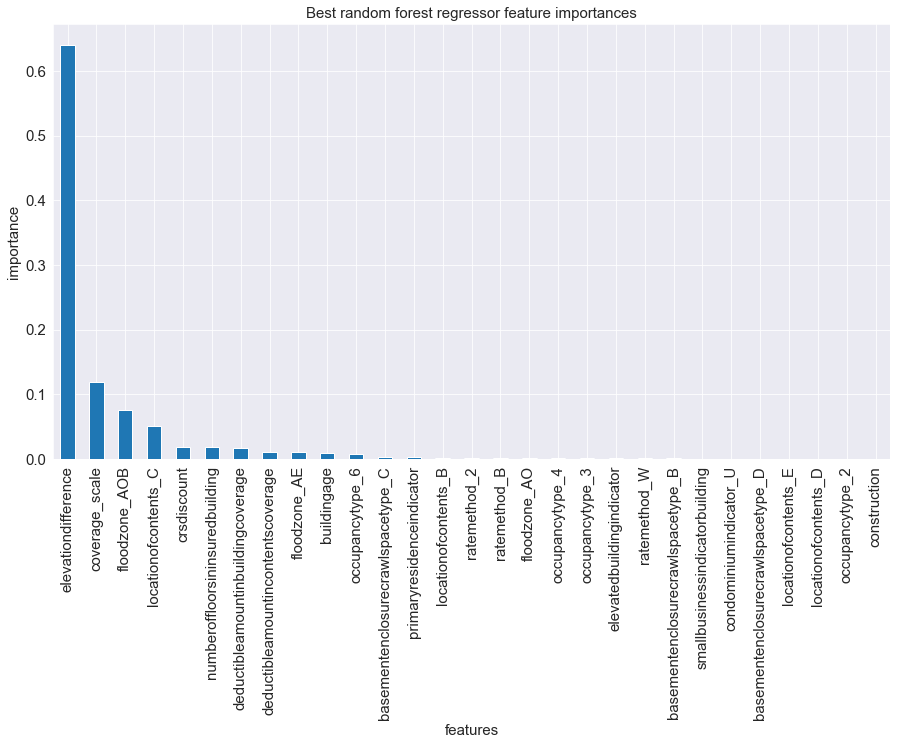

In [14]:
rf_best = GSCV_rf.best_estimator_

plt.subplots(figsize=(15,8))
imps = rf_best.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features', fontsize=15)
plt.ylabel('importance', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Best random forest regressor feature importances', fontsize=15);


As expected, the dominant top four features are elevation difference, coverage_scale, floodzone of 'AOB', and location of contents of 'C'. 

In [15]:
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(RandomForestRegressor(), X, y, cv=5, n_jobs=-1, 
                                    scoring='neg_mean_squared_error',train_sizes=np.linspace(0.01, 0.9, 10))

train_mean_rf = abs(np.mean(train_scores_rf, axis=1))
train_std_rf = abs(np.std(train_scores_rf, axis=1))

test_mean_rf = abs(np.mean(test_scores_rf, axis=1))
test_std_rf = abs(np.std(test_scores_rf, axis=1))

(array([-0.0025,  0.    ,  0.0025,  0.005 ,  0.0075,  0.01  ,  0.0125,
         0.015 ,  0.0175,  0.02  ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

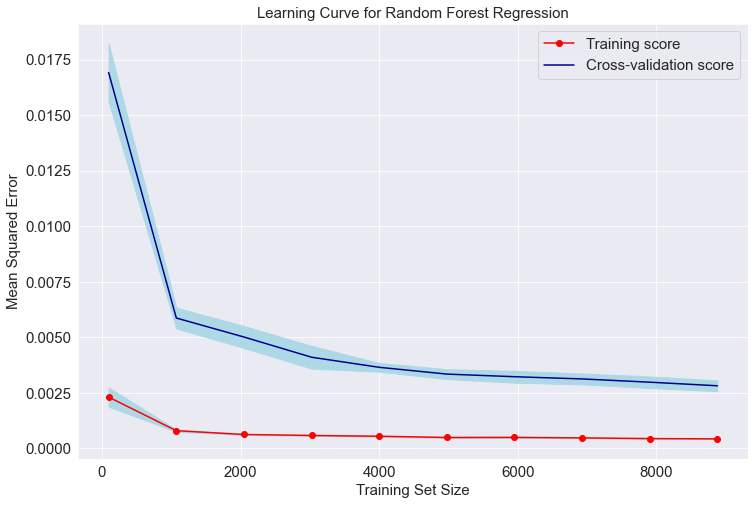

In [16]:
plt.figure(figsize=(12,8))

plt.plot(train_sizes_rf, train_mean_rf, 'o-', color="r",  label="Training score")
plt.plot(train_sizes_rf, test_mean_rf, color="darkblue", label="Cross-validation score")

plt.fill_between(train_sizes_rf, train_mean_rf - train_std_rf, train_mean_rf + train_std_rf, color="lightblue")
plt.fill_between(train_sizes_rf, test_mean_rf - test_std_rf, test_mean_rf + test_std_rf, color="lightblue")

plt.title("Learning Curve for Random Forest Regression", fontsize=15)
plt.xlabel("Training Set Size", fontsize=15), 
plt.ylabel("Mean Squared Error", fontsize=15)
plt.legend(loc="best", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

As we can see, mean squared error values decrease with the number of training set size for both training and test datasets, and they are converging to a very small value for both datasets. Overall, this very small mean squared error indicates that this model can make very good predictions for the target.

### 4.5.2 K-Nearest Neighbors Regression Model<a id='4.5.2_KNN'></a>

First, let's just apply the default settings of K-nearest Neighbors regression model to see how the model performs.

In [17]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [18]:
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred)) 
print('R2: ', r2_score(y_test, y_pred)) 

MAE:  0.05140780734143511
MSE:  0.009526970665119453
R2:  0.8741784813536393


We can see that using the default settings of K-nearest neighbors regression gives us a decent fit: R2 is 0.874, mean absolute error is 0.052, and mean squared error is 0.0095, which are slightly worse than the random forest regreession model performance. We can tune the hyperparameters to see if we can get slightly better performance.

In [19]:
knn_reg = KNeighborsRegressor()
param_grid = {
   'weights': ['uniform', 'distance'],
   'n_neighbors': [5, 8, 10, 12],
   'algorithm': ['auto', 'ball_tree', 'kd_tree'],
   'p': [1, 2],
   'leaf_size': [20, 30, 40]
}
GSCV_knn = GridSearchCV(estimator=knn_reg, param_grid=param_grid, cv=5)
GSCV_knn.fit(X_train, y_train)
print("Best parameters:", GSCV_knn.best_params_)

Best parameters: {'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [20]:
y_pred = GSCV_knn.predict(X_test)

In [21]:
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred)) 
print('R2: ', r2_score(y_test, y_pred)) 

MAE:  0.045077490275703416
MSE:  0.00792812071119188
R2:  0.8952942941720163


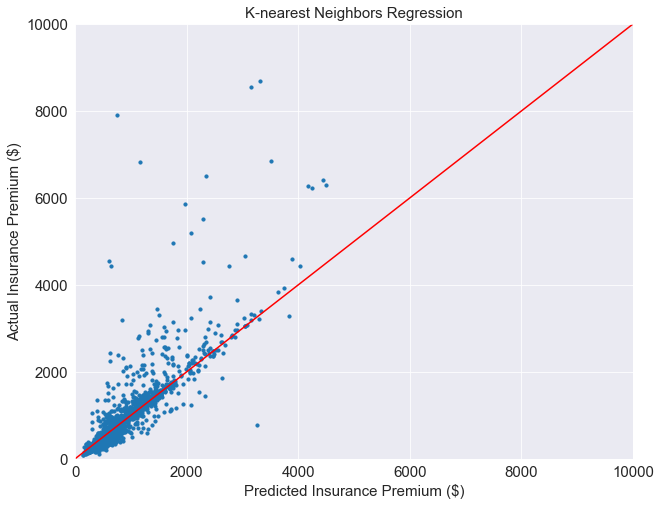

In [22]:
plt.figure(figsize=(10,8))
plt.scatter(10**y_pred, 10**y_test, s=10)
plt.title('K-nearest Neighbors Regression', fontsize=15)
plt.xlabel('Predicted Insurance Premium ($)', fontsize=15)
plt.ylabel('Actual Insurance Premium ($)', fontsize=15)
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot([0,10000],[0,10000], color='r')

We can see that for the K-nearest Neighbors regression model, the model with the best estimator performs slightly better than the model with the default settings:  

MAE decreases from 0.052 to 0.045;

MSE decreases from 0.0095 to 0.0079;

R2 increases from 0.874 to 0.895; 

All the three statistical components are improving from the deafult settings to the best estimator of the K-nearest neighbors regression model. 

Another way to check the number of neighbors which gives the best model performance is to plot the scores for the train and test datasets vs. number of neighbors.

In [23]:
test_scores = []
train_scores = []

for i in range(1,21):

    knn_reg = KNeighborsRegressor(n_neighbors=i)
    knn_reg.fit(X_train,y_train)
    
    train_scores.append(knn_reg.score(X_train,y_train))
    test_scores.append(knn_reg.score(X_test,y_test))

Text(0, 0.5, 'Score')

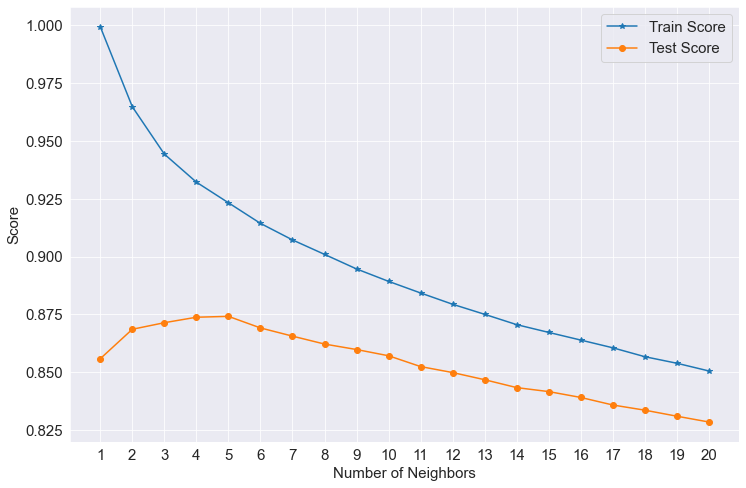

In [24]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1,21), train_scores, marker='*',label='Train Score')
plt.plot(np.arange(1,21), test_scores, marker='o',label='Test Score')
plt.xticks(np.arange(1,21), fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.xlabel('Number of Neighbors', fontsize=15)
plt.ylabel('Score', fontsize=15)

The scores for the train dataset are the highest when n_neighbors=1, whereas the scores for the test dataset are the highest when n_neighbors=5. Overall, n_neighbors is chosen to be 5. 

In [25]:
train_sizes_knn, train_scores_knn, test_scores_knn = learning_curve(KNeighborsRegressor(), X, y, cv=5, n_jobs=-1, 
                                                        scoring='r2',train_sizes=np.linspace(0.01, 0.9, 10))

train_mean_knn = np.mean(train_scores_knn, axis=1)
train_std_knn = np.std(train_scores_knn, axis=1)

test_mean_knn = np.mean(test_scores_knn, axis=1)
test_std_knn = np.std(test_scores_knn, axis=1)

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

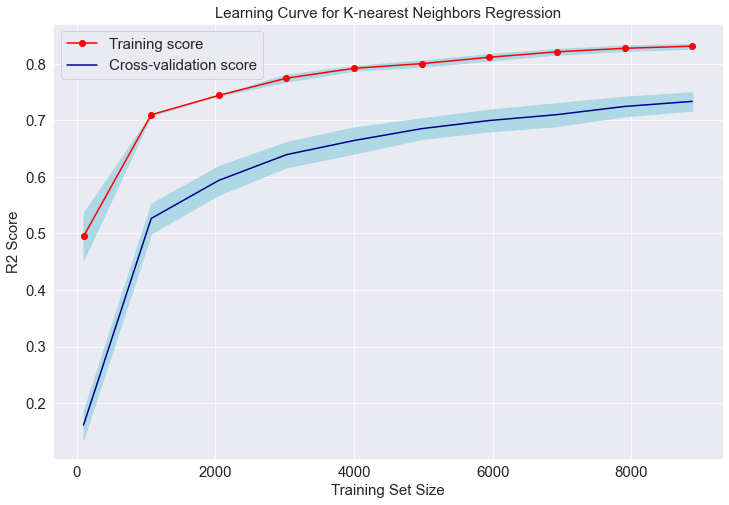

In [26]:
plt.figure(figsize=(12,8))

plt.plot(train_sizes_knn, train_mean_knn, 'o-', color="r",  label="Training score")
plt.plot(train_sizes_knn, test_mean_knn, color="darkblue", label="Cross-validation score")

plt.fill_between(train_sizes_knn, train_mean_knn - train_std_knn, train_mean_knn + train_std_knn, color="lightblue")
plt.fill_between(train_sizes_knn, test_mean_knn - test_std_knn, test_mean_knn + test_std_knn, color="lightblue")

plt.title("Learning Curve for K-nearest Neighbors Regression", fontsize=15)
plt.xlabel("Training Set Size", fontsize=15), 
plt.ylabel("R2 Score", fontsize=15)
plt.legend(loc="best", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

The learning curve shows that the r2 scores of both train and test datasets increase with the train set size, indicating that there is no underfitting. Additionally, the variances for both datasets are very low and decrease with the train set size, indicating that there is no overfitting. Overall, both datasets have low bias (i.e. high accuracy rates) and low variance. 

### 4.5.3 Extreme Gradient Boosting Model<a id='4.5.3_XGBoost'></a>

First, let's just apply the default settings of Extreme Gradient Boosting model to see how the model performs.

In [27]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)

In [28]:
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred)) 
print('R2: ', r2_score(y_test, y_pred)) 

MAE:  0.02328643098534824
MSE:  0.0028569880392961744
R2:  0.9622681137064018


As we can see, using the default settings of extreme gradient boosting model gives us a very good fit: R2 is 0.962, mean absolute error is 0.023, and mean squared error is 0.00286. These values are even better than those from the random forest regression model. We can still tune the hyperparameters to see if we can get slightly better performance. Here we use random search instead of grid search. 

In [29]:
xgbr = xgb.XGBRegressor()

param_grid = {'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 200, 300]
             }

clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=param_grid,
                         scoring='neg_mean_squared_error',
                         n_iter=25)

clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest MSE: ", -clf.best_score_)

Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.7}
Lowest MSE:  0.0019630356599187005


In [30]:
y_pred = clf.predict(X_test)

In [31]:
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred)) 
print('R2: ', r2_score(y_test, y_pred)) 

MAE:  0.02285496319205417
MSE:  0.0024055937265239757
R2:  0.9682296223472617


We can see that the MAE, MSE, and R2 values from the model with the best estimator are about the samee as those with the default settings of extreme gradient boosting. 

Let's plot the estimated premium price vs. actual premium price for the test dataset.

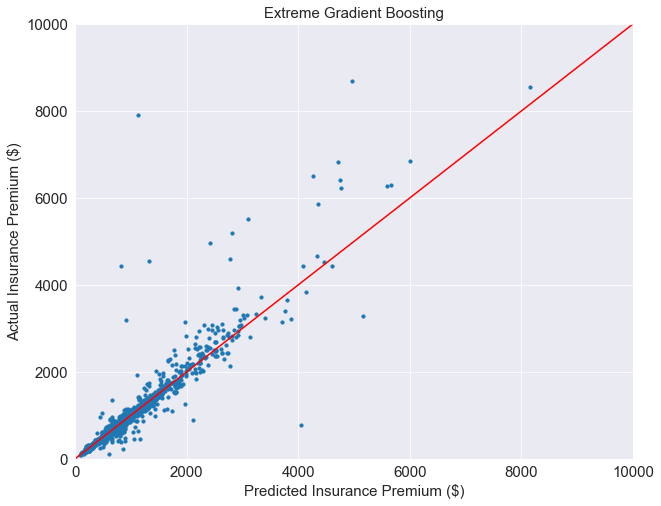

In [33]:
plt.figure(figsize=(10,8))
plt.scatter(10**y_pred, 10**y_test, s=10)
plt.title('Extreme Gradient Boosting', fontsize=15)
plt.xlabel('Predicted Insurance Premium ($)', fontsize=15)
plt.ylabel('Actual Insurance Premium ($)', fontsize=15)
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot([0,10000],[0,10000], color='r')

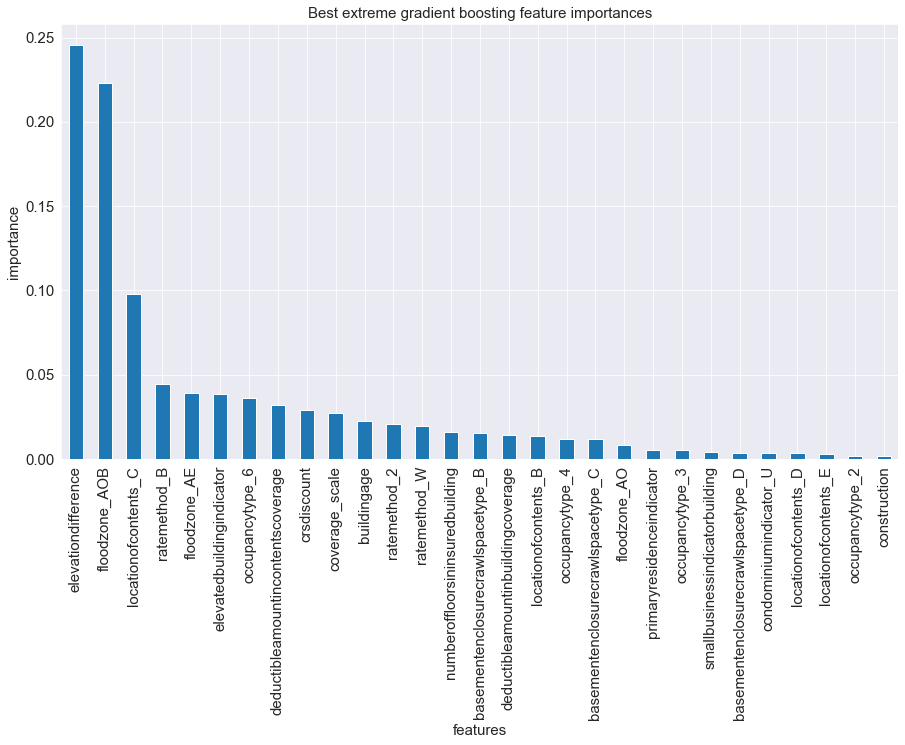

In [34]:
xgb_best = clf.best_estimator_

plt.subplots(figsize=(15,8))
imps = xgb_best.feature_importances_
xgb_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
xgb_feat_imps.plot(kind='bar')
plt.xlabel('features', fontsize=15)
plt.ylabel('importance', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Best extreme gradient boosting feature importances', fontsize=15);


Similar to the random forest regression, elevation difference is the most important feature. The difference is the secone most important feature, which is flood zone of 'AOB' for extreme gradient boosting, whereas it ranks third for random forest regression. 

In [35]:
train_sizes_xgb, train_scores_xgb, test_scores_xgb = learning_curve(xgb.XGBRegressor(), X, y, cv=5, n_jobs=-1, 
                                    scoring='r2',train_sizes=np.linspace(0.01, 0.9, 10))

train_mean_xgb = np.mean(train_scores_xgb, axis=1)
train_std_xgb = np.std(train_scores_xgb, axis=1)

test_mean_xgb = np.mean(test_scores_xgb, axis=1)
test_std_xgb = np.std(test_scores_xgb, axis=1)

(array([0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

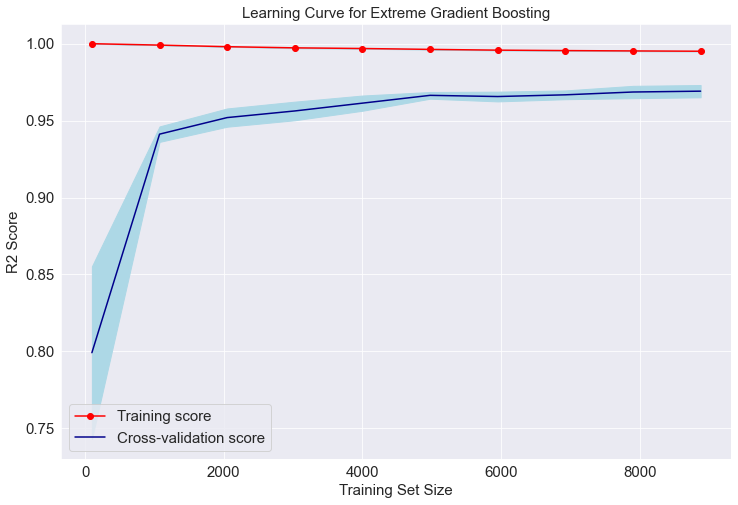

In [36]:
plt.figure(figsize=(12,8))

plt.plot(train_sizes_xgb, train_mean_xgb, 'o-', color="r",  label="Training score")
plt.plot(train_sizes_xgb, test_mean_xgb, color="darkblue", label="Cross-validation score")

plt.fill_between(train_sizes_xgb, train_mean_xgb - train_std_xgb, train_mean_xgb + train_std_xgb, color="lightblue")
plt.fill_between(train_sizes_xgb, test_mean_xgb - test_std_xgb, test_mean_xgb + test_std_xgb, color="lightblue")

plt.title("Learning Curve for Extreme Gradient Boosting", fontsize=15)
plt.xlabel("Training Set Size", fontsize=15), 
plt.ylabel("R2 Score", fontsize=15)
plt.legend(loc="best", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

The learning curve shows that the r2 scores remain very high (close to 1) for the training dataset and increase with the train set size for the test dataset. Overall, R2 scores are really high for both datasets, indicating that this model can make very good predictions for the target.

### 4.5.4 Catboost Regression Model<a id='4.5.43_CatBoost'></a>

In [37]:
cat_reg = cat.CatBoostRegressor()
cat_reg.fit(X_train, y_train, verbose=False)
y_pred = cat_reg.predict(X_test)

In [38]:
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred)) 
print('R2: ', r2_score(y_test, y_pred)) 

MAE:  0.019877424534244684
MSE:  0.0020690541712535156
R2:  0.9726742584668764


In [39]:
cat_reg = cat.CatBoostRegressor()
param_grid = {
   'depth': [6, 8, 10],
   'learning_rate': [0.01, 0.05, 0.1],
   'iterations': [100,500,1000],
}
GSCV_cat = GridSearchCV(estimator=cat_reg, param_grid=param_grid, cv=5, n_jobs=-1)
GSCV_cat.fit(X_train, y_train, verbose=False)
print("Best parameters:", GSCV_cat.best_params_)

Best parameters: {'depth': 6, 'iterations': 1000, 'learning_rate': 0.1}


In [40]:
y_pred = GSCV_cat.predict(X_test)

In [41]:
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred)) 
print('R2: ', r2_score(y_test, y_pred)) 

MAE:  0.01991155040947698
MSE:  0.0020870248599063833
R2:  0.9724369218131904


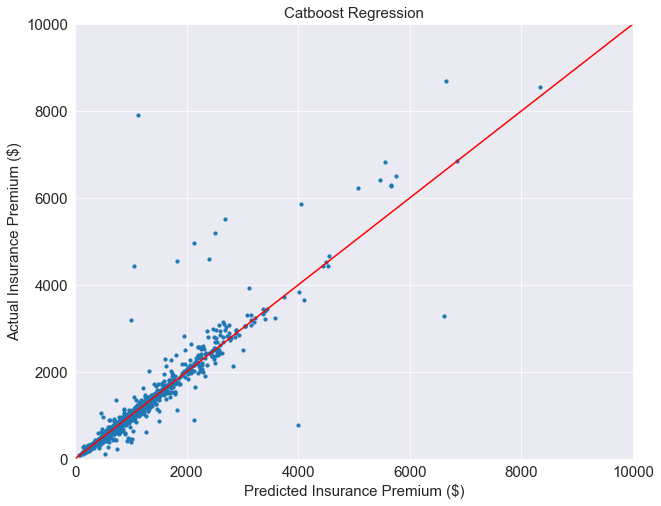

In [43]:
plt.figure(figsize=(10,8))
plt.scatter(10**y_pred, 10**y_test, s=10)
plt.title('Catboost Regression', fontsize=15)
plt.xlabel('Predicted Insurance Premium ($)', fontsize=15)
plt.ylabel('Actual Insurance Premium ($)', fontsize=15)
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot([0,10000],[0,10000], color='r')

The three statistical values are about the same as those with the default settings for Catboost model. 

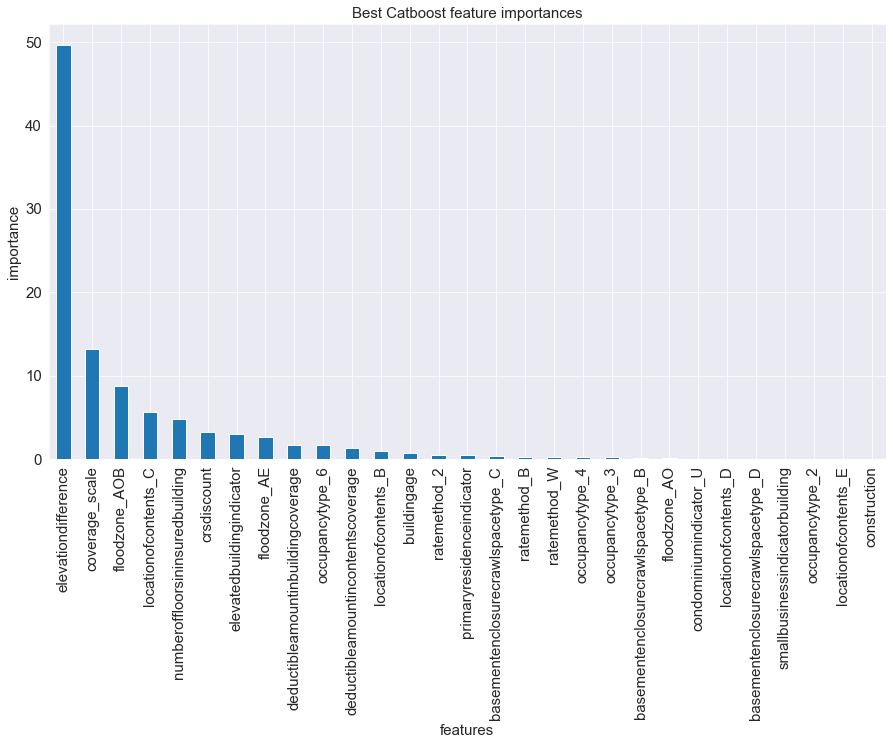

In [44]:
cat_best = GSCV_cat.best_estimator_

plt.subplots(figsize=(15,8))
imps = cat_best.feature_importances_
cat_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
cat_feat_imps.plot(kind='bar')
plt.xlabel('features', fontsize=15)
plt.ylabel('importance', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Best Catboost feature importances', fontsize=15);


Similar to the random forest regression model, the dominant top four features are elevation difference, coverage_scale, floodzone of 'AOB', and location of contents of 'C'. 

In [45]:
train_sizes_cat, train_scores_cat, test_scores_cat = learning_curve(cat.CatBoostRegressor(), X, y, cv=5, n_jobs=-1, 
                                    scoring='r2',train_sizes=np.linspace(0.01, 0.9, 10))

train_mean_cat = np.mean(train_scores_cat, axis=1)
train_std_cat = np.std(train_scores_cat, axis=1)

test_mean_cat = np.mean(test_scores_cat, axis=1)
test_std_cat = np.std(test_scores_cat, axis=1)

(array([0.775, 0.8  , 0.825, 0.85 , 0.875, 0.9  , 0.925, 0.95 , 0.975,
        1.   , 1.025]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

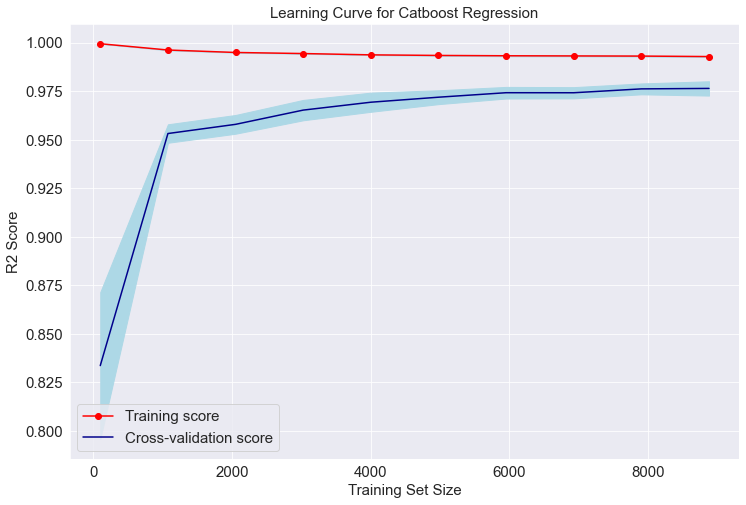

In [46]:
plt.figure(figsize=(12,8))

plt.plot(train_sizes_cat, train_mean_cat, 'o-', color="r",  label="Training score")
plt.plot(train_sizes_cat, test_mean_cat, color="darkblue", label="Cross-validation score")

plt.fill_between(train_sizes_cat, train_mean_cat - train_std_cat, train_mean_cat + train_std_cat, color="lightblue")
plt.fill_between(train_sizes_cat, test_mean_cat - test_std_cat, test_mean_cat + test_std_cat, color="lightblue")

plt.title("Learning Curve for Catboost Regression", fontsize=15)
plt.xlabel("Training Set Size", fontsize=15), 
plt.ylabel("R2 Score", fontsize=15)
plt.legend(loc="best", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

Similar to extreme gradient boosting, the learning curve for Catboost shows that the r2 scores remain very high (close to 1) for the training dataset and increase with the train set size for the test dataset. Overall, R2 scores are really high for both datasets, indicating that this model can make very good predictions for the target.

## 4.6 Summary<a id='4.6_Summary'></a>

In this notebook, we used four different machine learning models to evaluate the dataset. All models perform well. Among them, catboost regression, extreme gradient boosting, and random forest regression perform slightly better than K-nearest neighbors regression based on the mean squared error and R2 values. 

Elevation difference is determined to be the most important feature to predict the target: insurance premium price. Other than that, total coverage, certain flood zones, number of building floors, location of contents, etc. also play an important role in predicting the insurance premium price.  